In [279]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [280]:
import collections
from typing import List, Optional, Tuple

from matplotlib import rcParams
import matplotlib.lines as mlines
import matplotlib.markers as mmarkers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.special
import scipy.stats
import seaborn as sns

from src import evaluation, utils_plot


pd.set_option('display.max_colwidth', None)

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Palatio']
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{amsfonts}'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [281]:
DATASET = 'imagenet'
results_dfs = utils_plot.read_and_prepare_stats_dfs(DATASET)

results_dfs['all'].columns

Index(['model_dir_id', 'num_params', 'training_data', 'training_data_group',
       'training_data_size', 'arch', 'arch_family', 'arch_group',
       'extra_annotations', 'top1_val_acc', 'imagenet_top1_val_acc',
       'imagenet_mla_val_acc', 'num_all_samples', 'num_group_samples',
       'num_group_correct', 'num_all_top1_errors', 'num_group_top1_errors',
       'mla_all', 'mla_all_minor_error', 'mla_all_explainable_error',
       'mla_group', 'mla_group_minor_error', 'mla_group_explainable_error',
       'num_collapsed_mappings', 'num_ambiguous', 'num_same_superclass',
       'num_common_co_occ', 'num_non_prototypical', 'num_OOV_clip',
       'num_not_classified', 'num_all_imagenet-m_samples',
       'num_group_imagenet-m_samples', 'num_imagenet-m_errors'],
      dtype='object')

In [346]:
results_dfs["all"]

model_dir_id  num_params       training_data   
0           facebook--convnext-base-224    88591464  ImageNet-1k (1.2M)  \
1    facebook--convnext-base-224-22k-1k    88591464  ImageNet-21k (14M)   
2           facebook--convnext-base-384    88591464  ImageNet-1k (1.2M)   
3    facebook--convnext-base-384-22k-1k    88591464  ImageNet-21k (14M)   
4          facebook--convnext-large-224   197767336  ImageNet-1k (1.2M)   
..                                  ...         ...                 ...   
957               torchvision--vit_l_16   304326632  ImageNet-1k (1.2M)   
958          torchvision--vit_l_16_swag   305174504    Instagram (3.6B)   
959               torchvision--vit_l_32   306535400  ImageNet-1k (1.2M)   
960       torchvision--wide_resnet101_2   126886696  ImageNet-1k (1.2M)   
961        torchvision--wide_resnet50_2    68883240  ImageNet-1k (1.2M)   

    training_data_group  training_data_size         arch  arch_family   
0          small (< 5M)        1.200000e+06     convnext          cnn  \
1        medium (< 50M)        1.400000e+07     convnext          cnn   
2          small (< 5M)        1.200000e+06     convnext          cnn   
3        medium (< 50M)        1.400000e+07     convnext          cnn   
4          small (< 5M)        1.200000e+06     convnext          cnn   
..                  ...                 ...          ...          ...   
957        small (< 5M)        1.200000e+06          vit  transformer   
958     xlarge (> 500M)        3.600000e+09          vit  transformer   
959        small (< 5M)        1.200000e+06          vit  transformer   
960        small (< 5M)        1.200000e+06  wide_resnet          cnn   
961        small (< 5M)        1.200000e+06  wide_resnet          cnn   

    arch_group             extra_annotations  top1_val_acc  ...   
0     ConvNeXt                            []        83.826  ...  \
1     ConvNeXt                            []        85.812  ...   
2     ConvNeXt                            []        85.110  ...   
3     ConvNeXt                            []        86.798  ...   
4     ConvNeXt                            []        84.304  ...   
..         ...                           ...           ...  ...   
957        ViT                            []        79.656  ...   
958        ViT  ['Semi-Supervised Learning']        88.070  ...   
959        ViT                            []        76.962  ...   
960     ResNet                            []        82.514  ...   
961     ResNet                            []        81.606  ...   

     num_collapsed_mappings  num_ambiguous  num_same_superclass   
0                       104            948                  599  \
1                       102            909                  517   
2                       102            953                  512   
3                       114            909                  452   
4                       100            923                  571   
..                      ...            ...                  ...   
957                     103            937                  835   
958                      93            868                  361   
959                      97            944                  988   
960                     101            973                  685   
961                     104            966                  725   

     num_common_co_occ  num_non_prototypical  num_OOV_clip   
0                  102                     8           144  \
1                   71                     3           106   
2                  100                     9           124   
3                   62                     5           100   
4                   98                     9           134   
..                 ...                   ...           ...   
957                130                    10           184   
958                 50                     9            82   
959                136                    12           204   
960                

In [283]:
results_dfs['all']['extra_annotations'].value_counts()

extra_annotations
[]                                               761
['Distillation']                                  79
['Self-Supervised Learning']                      45
['Semi-Supervised Learning']                      32
['CLIP Training']                                 32
['Adversarial Training']                          11
['Self-Supervised Learning', 'CLIP Training']      2
Name: count, dtype: int64

In [284]:
results_dfs['all']['training_data'].value_counts()

training_data
ImageNet-1k (1.2M)           757
ImageNet-21k (14M)           131
LAION-2B (2.3B)               23
Instagram (940M)              10
JFT (300M)                    10
WIT (400M)                     9
Flickr YFCC (90M)              6
Instagram (3.6B)               6
RandomInternetImages (2B)      4
Merged (38M)                   2
LAION-400M (400M)              2
Merged (30M)                   2
Name: count, dtype: int64

In [285]:
results_dfs['all']['arch_group'].value_counts()

arch_group
ResNet          196
ViT             180
EfficientNet    141
CNN              96
RegNet           61
ConvNeXt         55
Hybrid           46
MetaFormer       42
XCiT             42
MaxViT           35
Swin             29
EVA              16
MLP              14
BEIT              9
Name: count, dtype: int64

# Class Overlap (Collapsed Mappings)

=== PER GROUP ===
Max ys: [6.48, 9.83]
Min ys: [0.95, 1.11]
Figure file name: ../figures/imagenet/x_axis=top1_val_acc_y_axis=num_collapsed_mappings_relative_to_group_top1_err_marker=arch_family_color=training_data_size_groups=organism_artifact


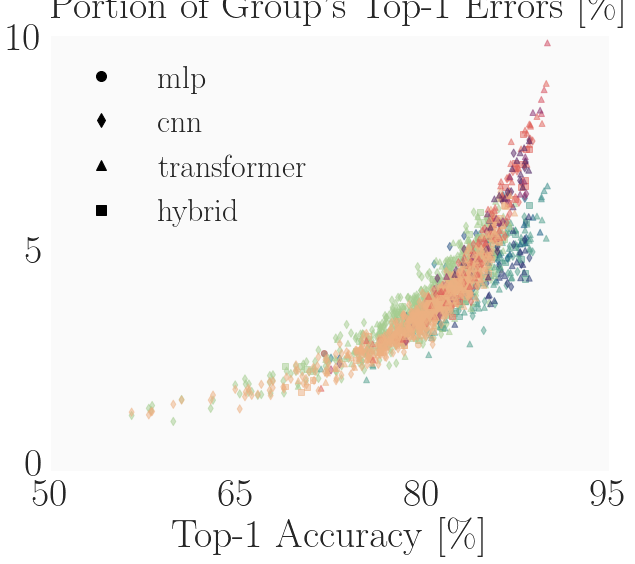

Max ys: [40, 95]
Min ys: [19, 50]
Figure file name: ../figures/imagenet/x_axis=top1_val_acc_y_axis=num_collapsed_mappings_abs_marker=arch_family_color=training_data_size_groups=organism_artifact


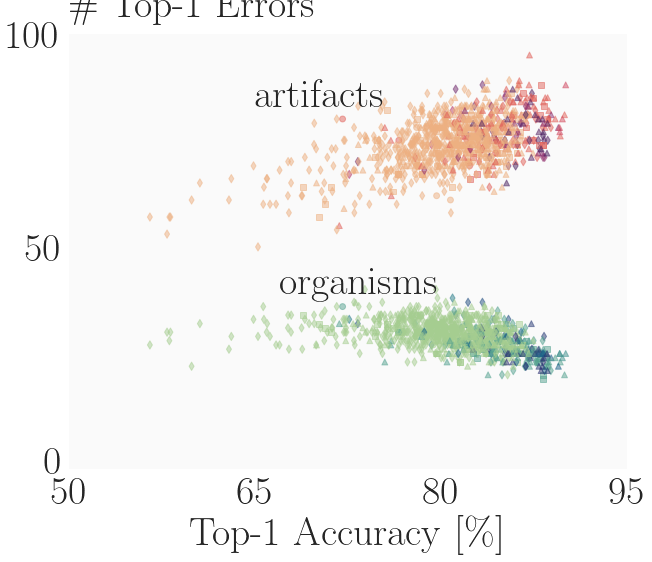

Max ys: [6.48, 9.83, 3.27]
Min ys: [0.95, 1.11, 0.14]
Figure file name: ../figures/imagenet/x_axis=top1_val_acc_y_axis=num_collapsed_mappings_relative_to_group_top1_err_marker=arch_family_color=training_data_size_groups=organism_artifact_other


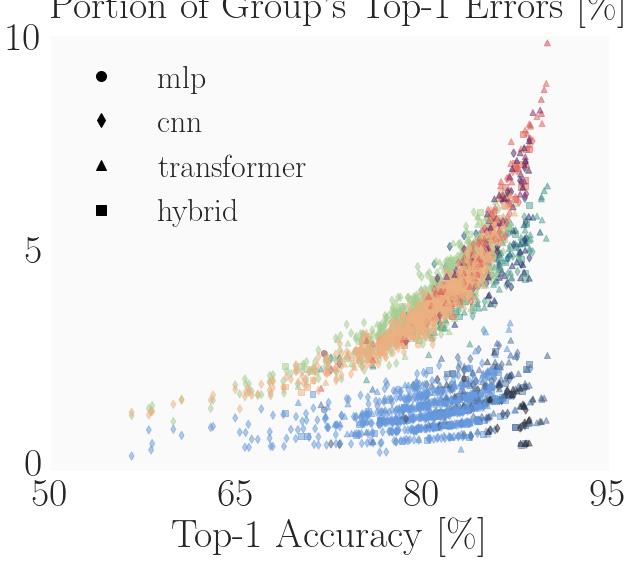

Max ys: [40, 95, 9]
Min ys: [19, 50, 1]
Figure file name: ../figures/imagenet/x_axis=top1_val_acc_y_axis=num_collapsed_mappings_abs_marker=arch_family_color=training_data_size_groups=organism_artifact_other


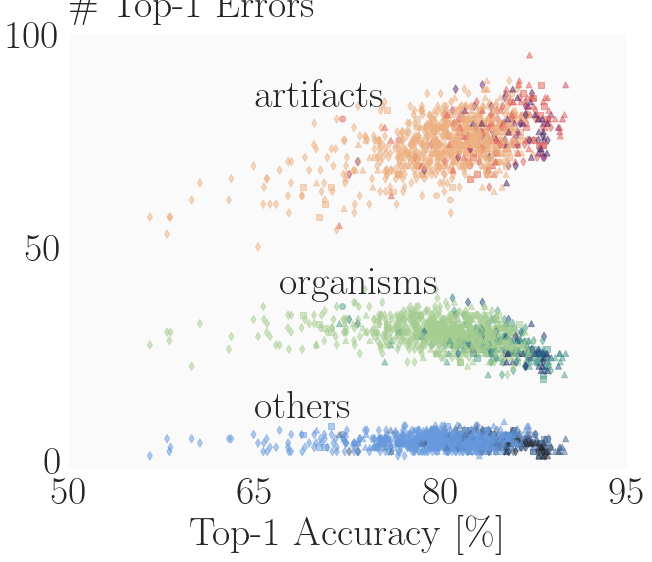

=== ALL ===
Max ys: [8.56]
Min ys: [1.11]
Figure file name: ../figures/imagenet/x_axis=top1_val_acc_y_axis=num_collapsed_mappings_relative_to_group_top1_err_marker=arch_family_color=training_data_size_groups=all


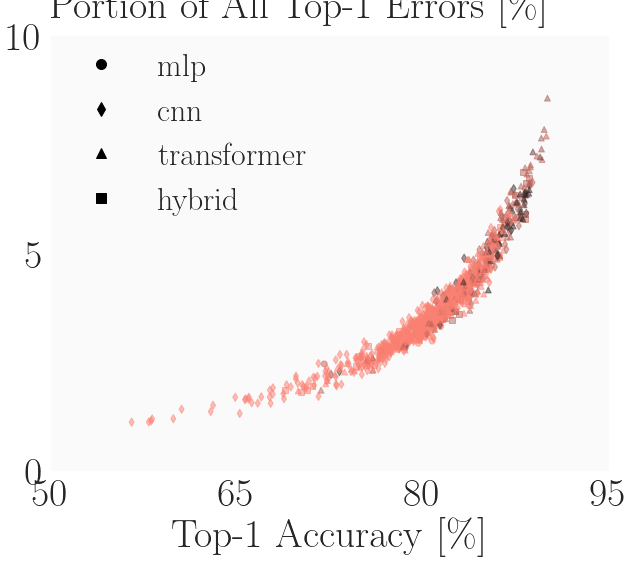

Max ys: [122]
Min ys: [78]
Figure file name: ../figures/imagenet/x_axis=top1_val_acc_y_axis=num_collapsed_mappings_abs_marker=arch_family_color=training_data_size_groups=all


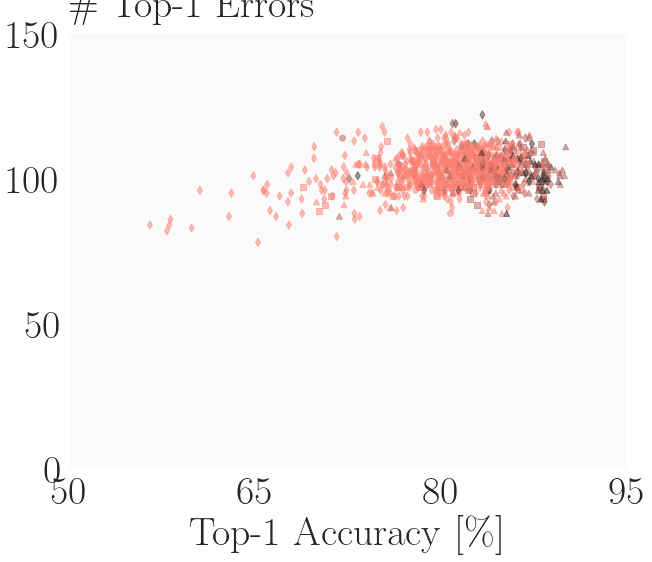

In [286]:
utils_plot.plot_class_overlap(results_dfs)

# ===============

# Missing Multi-Label Annotations

=== PER GROUP ===
Max ys: [49.0, 66.88]
Min ys: [7.49, 13.03]
Figure file name: ../figures/imagenet/x_axis=top1_val_acc_y_axis=num_ambiguous_relative_to_group_top1_err_marker=arch_family_color=training_data_size_groups=organism_artifact


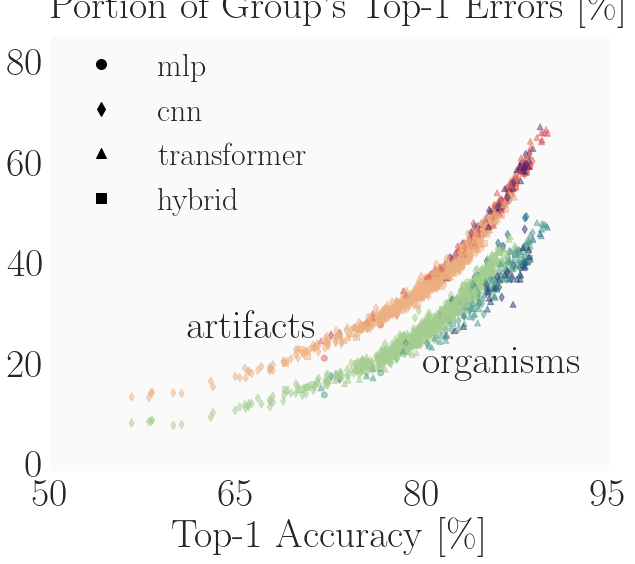

Max ys: [254, 827]
Min ys: [167, 587]
Figure file name: ../figures/imagenet/x_axis=top1_val_acc_y_axis=num_ambiguous_abs_marker=arch_family_color=training_data_size_groups=organism_artifact


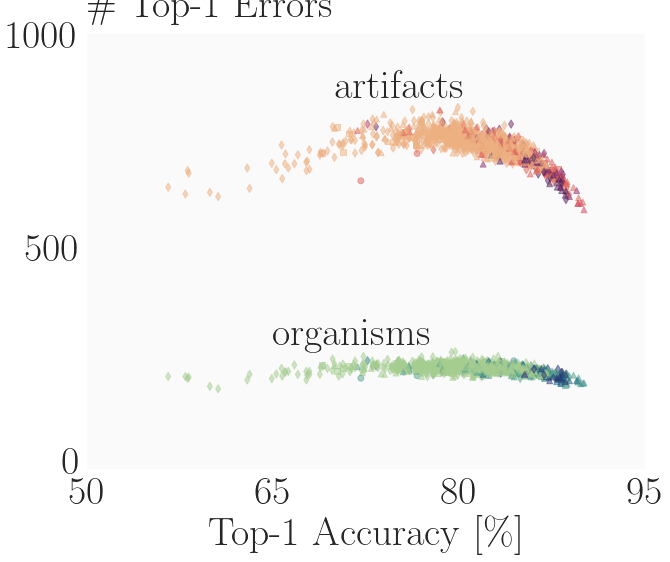

Max ys: [49.0, 66.88, 81.41]
Min ys: [7.49, 13.03, 25.21]
Figure file name: ../figures/imagenet/x_axis=top1_val_acc_y_axis=num_ambiguous_relative_to_group_top1_err_marker=arch_family_color=training_data_size_groups=organism_artifact_other


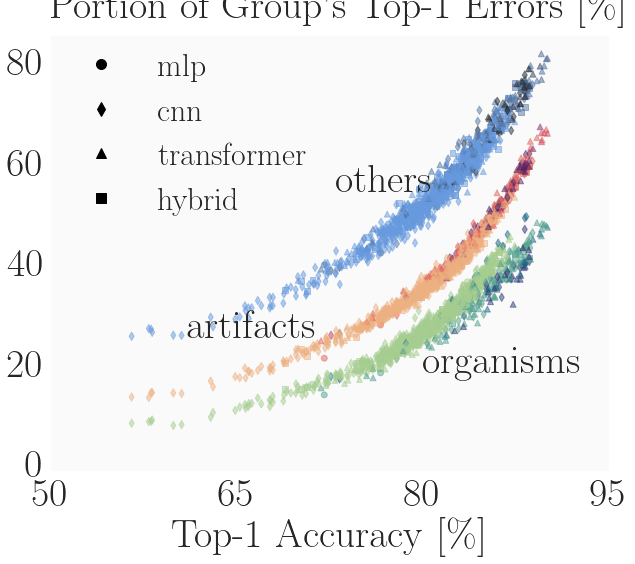

Max ys: [254, 827, 220]
Min ys: [167, 587, 154]
Figure file name: ../figures/imagenet/x_axis=top1_val_acc_y_axis=num_ambiguous_abs_marker=arch_family_color=training_data_size_groups=organism_artifact_other


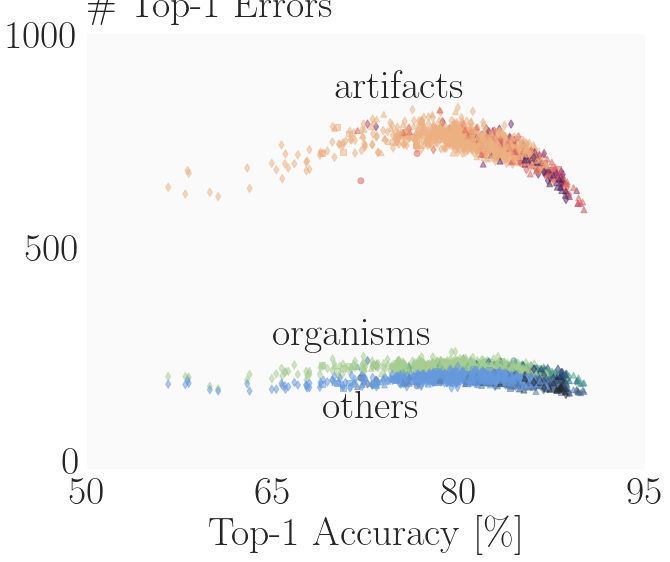

=== ALL ===
Max ys: [61.01]
Min ys: [11.22]
Figure file name: ../figures/imagenet/x_axis=top1_val_acc_y_axis=num_ambiguous_relative_to_group_top1_err_marker=arch_family_color=training_data_size_groups=all


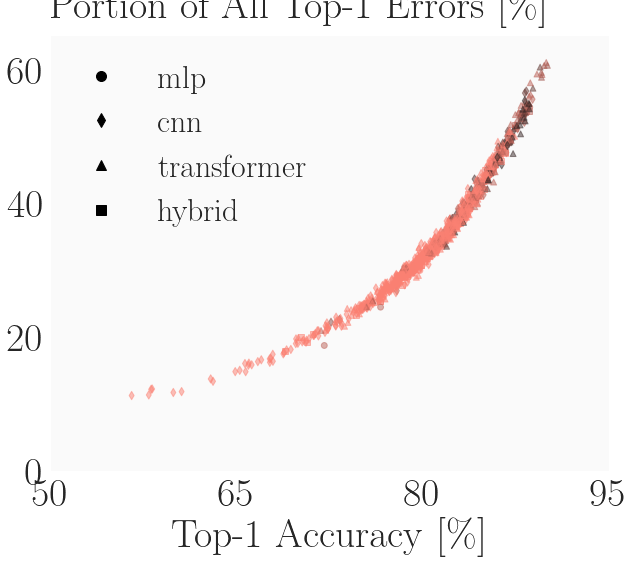

Max ys: [1061]
Min ys: [785]
Figure file name: ../figures/imagenet/x_axis=top1_val_acc_y_axis=num_ambiguous_abs_marker=arch_family_color=training_data_size_groups=all


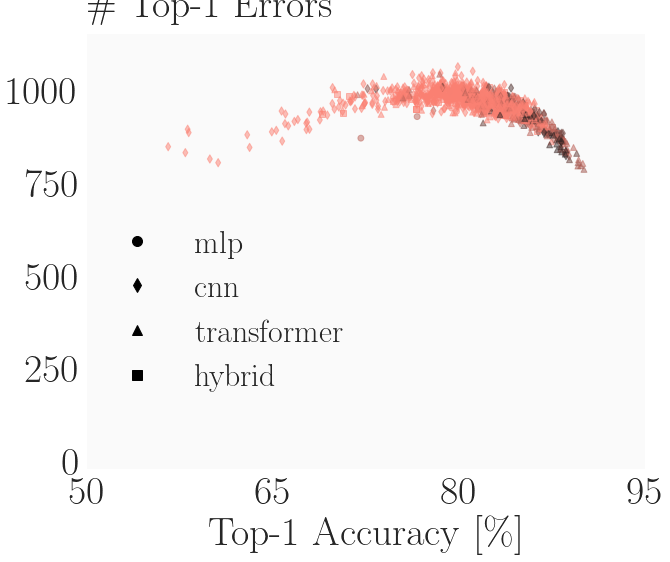

In [287]:
utils_plot.plot_missing_multi_labels(results_dfs)

# ===============

# Fine-Grained Errors

=== PER GROUP ===
Max ys: [87.93, 50.33]
Min ys: [39.86, 18.23]
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_same_superclass_relative_to_group_mle_marker=arch_family_color=training_data_size_groups=organism_artifact


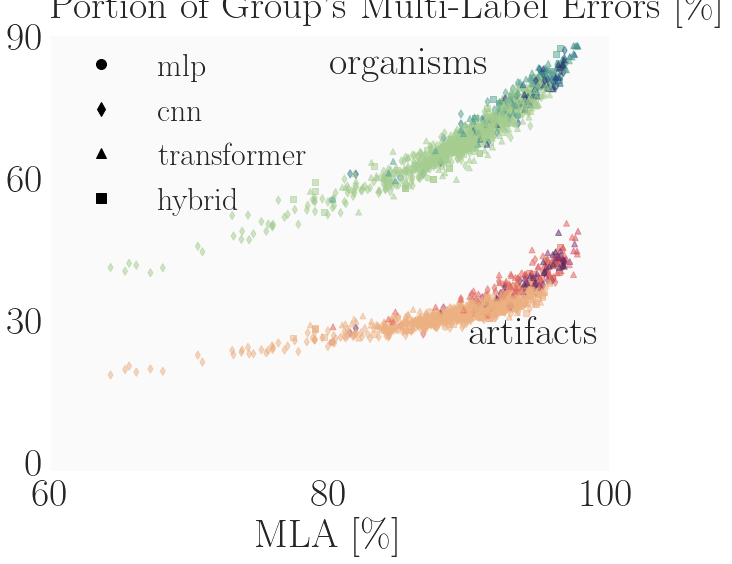

Max ys: [921, 827]
Min ys: [153, 99]
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_same_superclass_abs_marker=arch_family_color=training_data_size_groups=organism_artifact


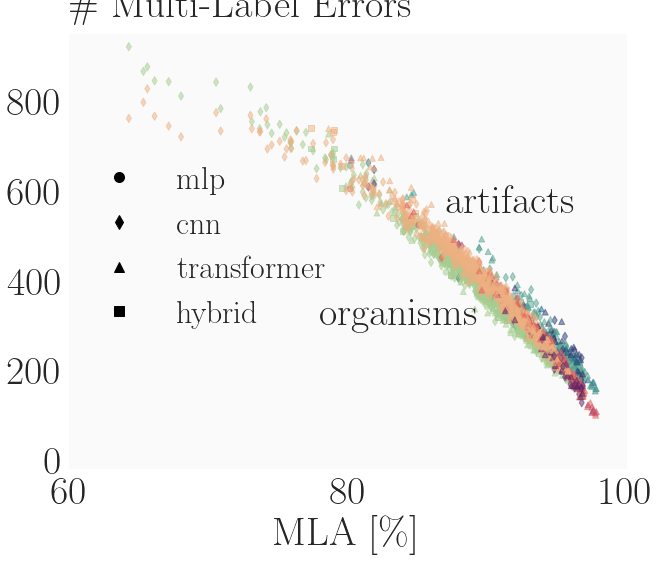

Max ys: [87.93, 50.33, 54.69]
Min ys: [39.86, 18.23, 23.53]
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_same_superclass_relative_to_group_mle_marker=arch_family_color=training_data_size_groups=organism_artifact_other


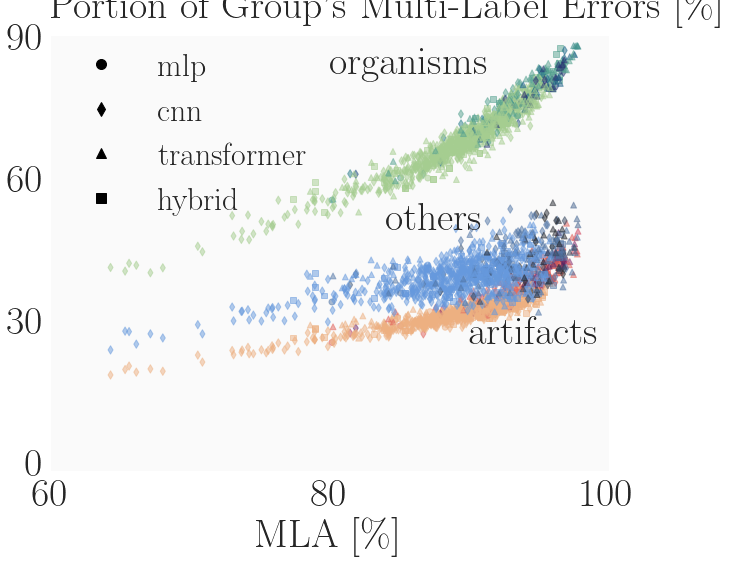

Max ys: [921, 827, 140]
Min ys: [153, 99, 15]
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_same_superclass_abs_marker=arch_family_color=training_data_size_groups=organism_artifact_other


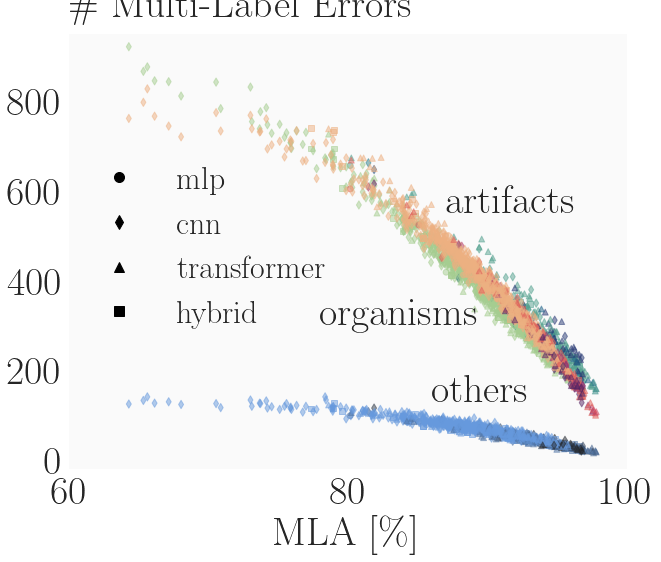

=== ALL ===
Max ys: [65.0]
Min ys: [26.12]
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_same_superclass_relative_to_group_mle_marker=arch_family_color=training_data_size_groups=all


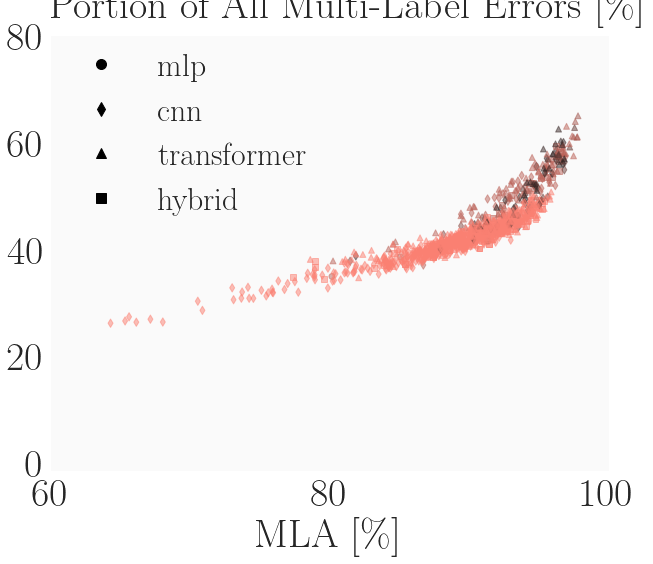

Max ys: [1742]
Min ys: [251]
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_same_superclass_abs_marker=arch_family_color=training_data_size_groups=all


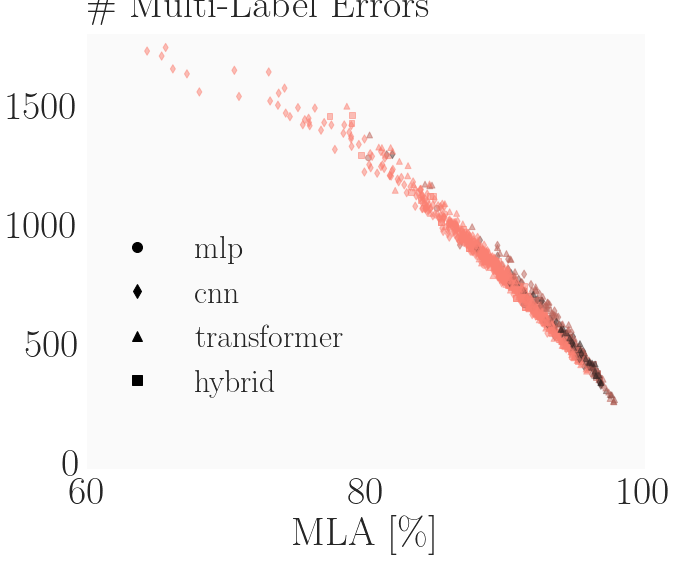

In [311]:
utils_plot.plot_fine_grained(results_dfs)
# utils_plot.plot_fine_grained(results_dfs, linear_fit=True,
#                             filter={"training_data_size": (">", 1500000),
#                                     "imagenet_mla_val_acc": (">", 85)},)

# ===============

# Fine-Grained OOV Errors

In [ ]:
# utils_plot.plot_fine_grained_OOV(results_dfs, linear_fit=True,
#                                 linear_fit_inflection_points={"artifact":93},
#                                  filter={
#                                       #  "training_data_size": (">", 1500000),
#                                       #  "imagenet_mla_val_acc": (">", 80)
#                                         "num_params": (">", 30000000)},
#                                 linear_fit_by_column="training_data_group",)

=== PER GROUP ===
Max ys: [7.2, 24.34]
Min ys: [1.05, 4.67]
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_OOV_clip_relative_to_group_mle_marker=arch_family_color=training_data_size_groups=organism_artifact


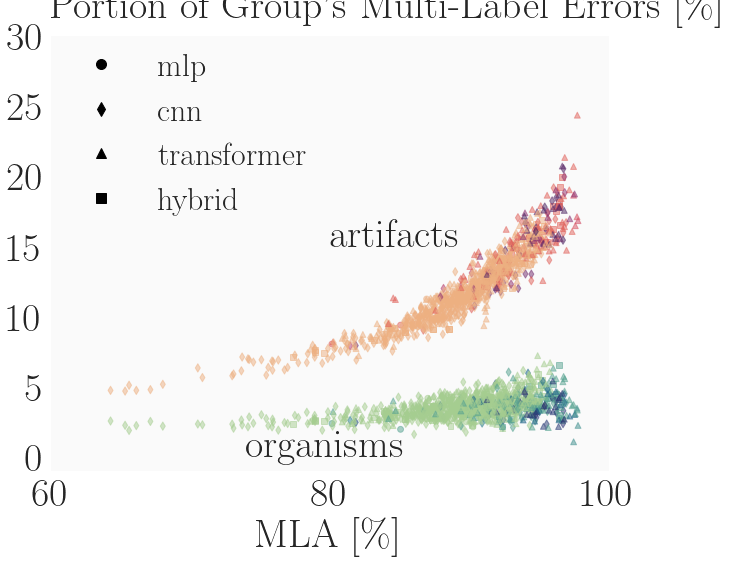

Max ys: [57, 221]
Min ys: [2, 37]
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_OOV_clip_abs_marker=arch_family_color=training_data_size_groups=organism_artifact


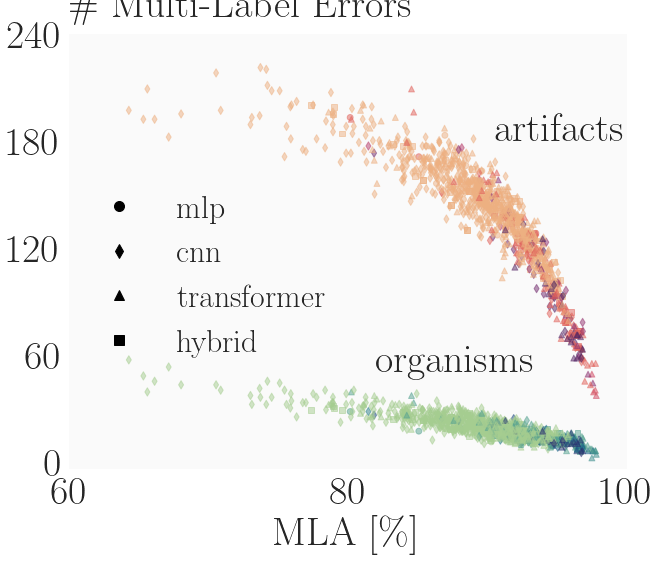

Max ys: [7.2, 24.34, 30.0]
Min ys: [1.05, 4.67, 5.31]
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_OOV_clip_relative_to_group_mle_marker=arch_family_color=training_data_size_groups=organism_artifact_other


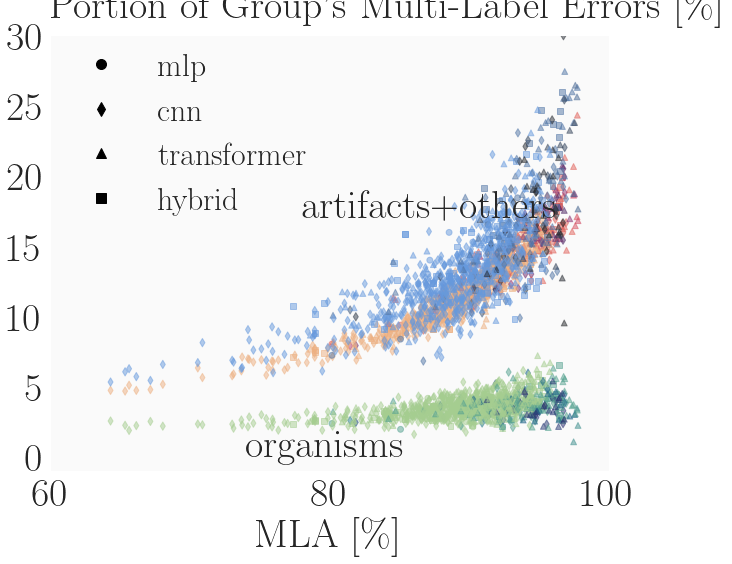

Max ys: [57, 221, 37]
Min ys: [2, 37, 4]
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_OOV_clip_abs_marker=arch_family_color=training_data_size_groups=organism_artifact_other


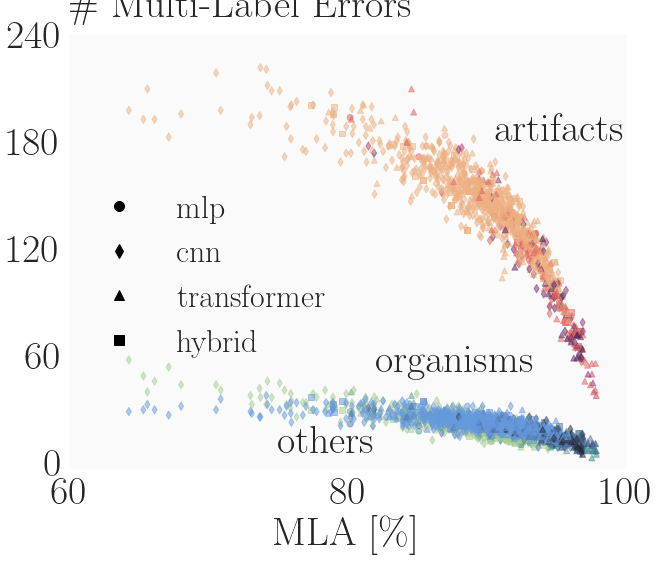

=== ALL ===
Max ys: [15.82]
Min ys: [3.86]
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_OOV_clip_relative_to_group_mle_marker=arch_family_color=training_data_size_groups=all


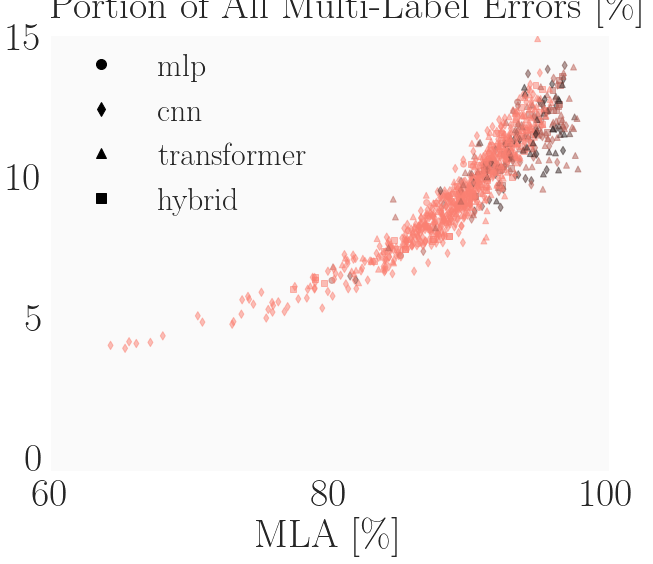

Max ys: [273]
Min ys: [41]
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_OOV_clip_abs_marker=arch_family_color=training_data_size_groups=all


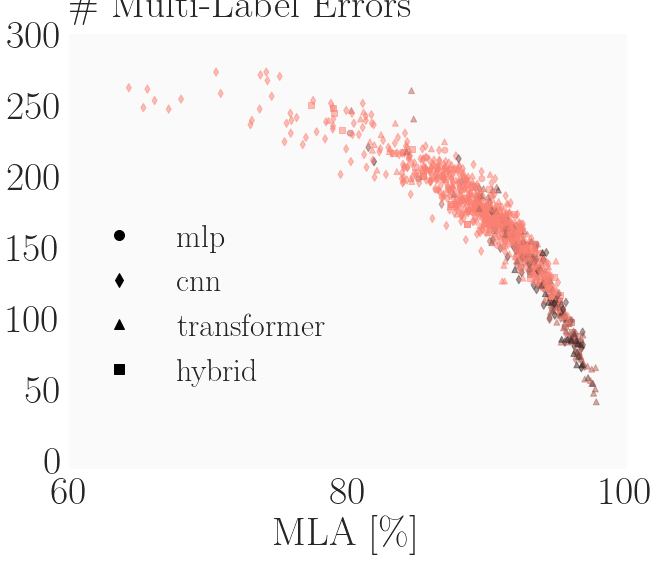

In [322]:
utils_plot.plot_fine_grained_OOV(results_dfs)

# ===============

# Non-prototypical

=== PER GROUP ===
Max ys: [1.28, 1.9]
Min ys: [0.0, 0.18]
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_non_prototypical_relative_to_group_mle_marker=arch_family_color=training_data_size_groups=organism_artifact


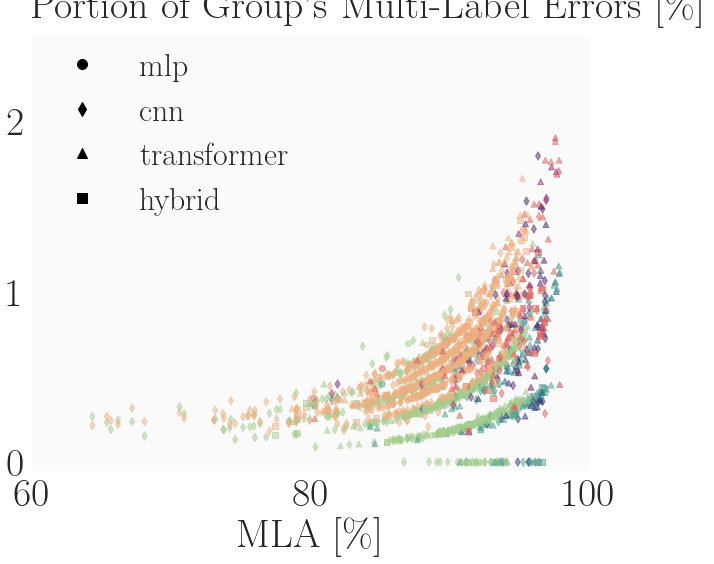

Max ys: [6, 12]
Min ys: [0, 1]
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_non_prototypical_abs_marker=arch_family_color=training_data_size_groups=organism_artifact


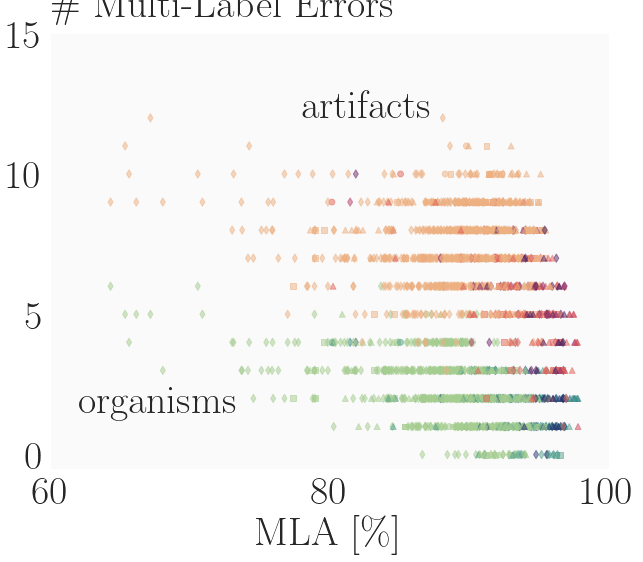

Max ys: [1.28, 1.9, 2.08]
Min ys: [0.0, 0.18, 0.0]
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_non_prototypical_relative_to_group_mle_marker=arch_family_color=training_data_size_groups=organism_artifact_other


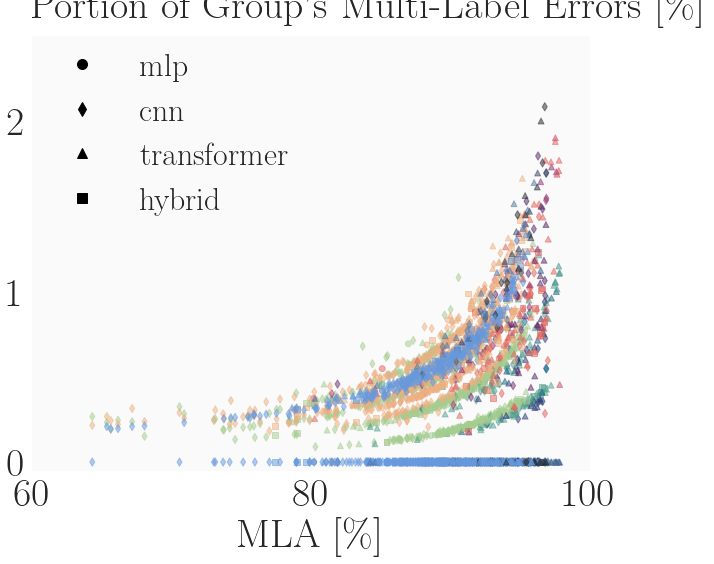

Max ys: [6, 12, 1]
Min ys: [0, 1, 0]
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_non_prototypical_abs_marker=arch_family_color=training_data_size_groups=organism_artifact_other


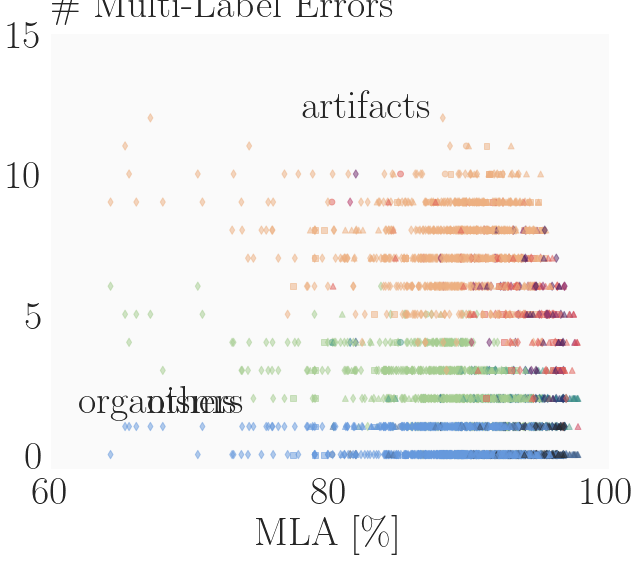

=== ALL ===
Max ys: [1.52]
Min ys: [0.19]
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_non_prototypical_relative_to_group_mle_marker=arch_family_color=training_data_size_groups=all


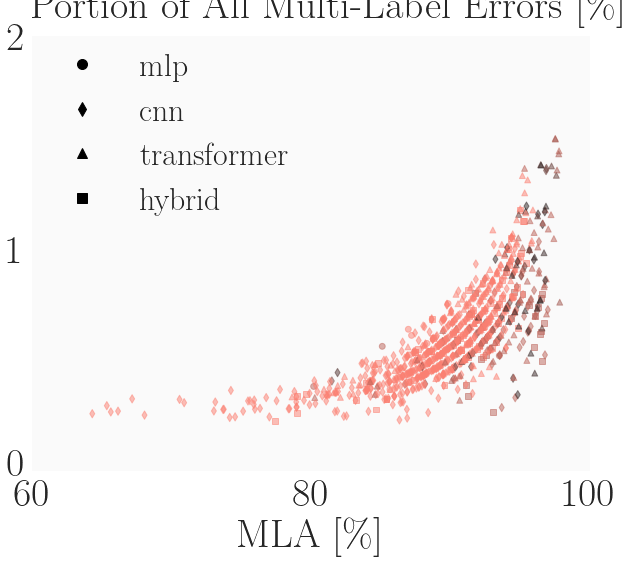

Max ys: [18]
Min ys: [3]
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_non_prototypical_abs_marker=arch_family_color=training_data_size_groups=all


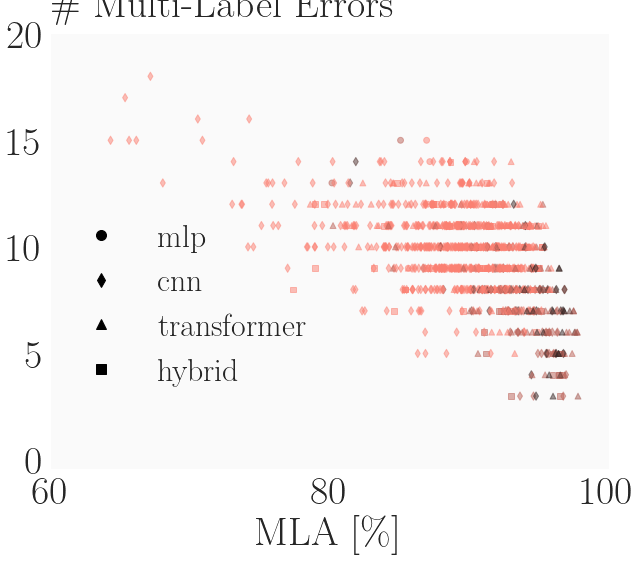

In [361]:
utils_plot.plot_non_proto(results_dfs)

# ===============

# Common co-occurrences (Spurious Correlations)

=== PER GROUP ===
Max ys: [4.37, 15.1]
Min ys: [0.33, 4.45]
Plot linear fit for group: organism
slope: 0.0203, intercept: 1.9254, rvalue: 0.1954, r^2: 0.0382, a_conf: [0.0149 , 0.0257], std_b: [1.8990 , 1.9517]
Plot linear fit for group: artifact
slope: 0.1791, intercept: 8.2268, rvalue: 0.7783, r^2: 0.6058, a_conf: [0.1678 , 0.1904], std_b: [8.1629 , 8.2907]
slope: 0.5251, intercept: 7.8814, rvalue: 0.5529, r^2: 0.3057, a_conf: [0.5063 , 0.5440], std_b: [7.7011 , 8.0617]
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_common_co_occ_relative_to_group_mle_marker=arch_family_color=training_data_size_groups=organism_artifact


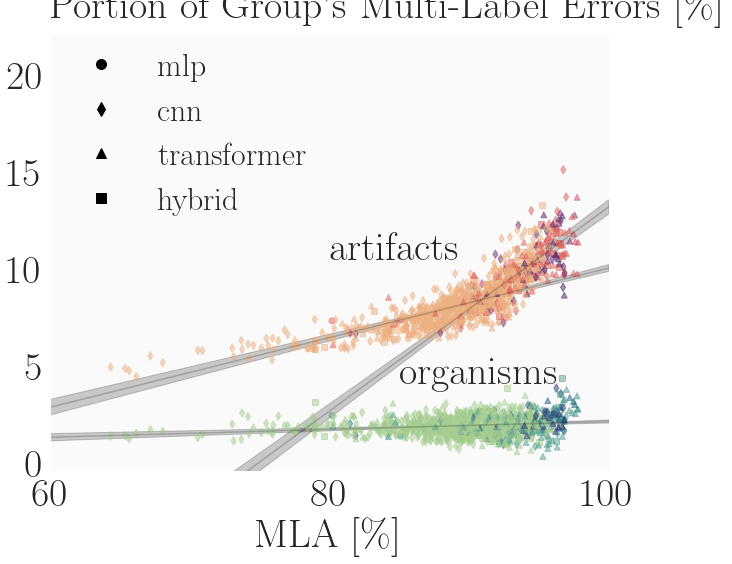

Max ys: [41, 210]
Min ys: [1, 22]
Plot linear fit for group: organism
slope: -0.9577, intercept: 10.6902, rvalue: -0.8628, r^2: 0.7444, a_conf: [-0.9875 , -0.9279], std_b: [10.5452 , 10.8352]
Plot linear fit for group: artifact
slope: -5.3494, intercept: 102.5913, rvalue: -0.9319, r^2: 0.8685, a_conf: [-5.4741 , -5.2246], std_b: [101.8851 , 103.2975]
slope: -11.8189, intercept: 122.0431, rvalue: -0.9114, r^2: 0.8306, a_conf: [-12.2265 , -11.4113], std_b: [118.1506 , 125.9355]
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_common_co_occ_abs_marker=arch_family_color=training_data_size_groups=organism_artifact


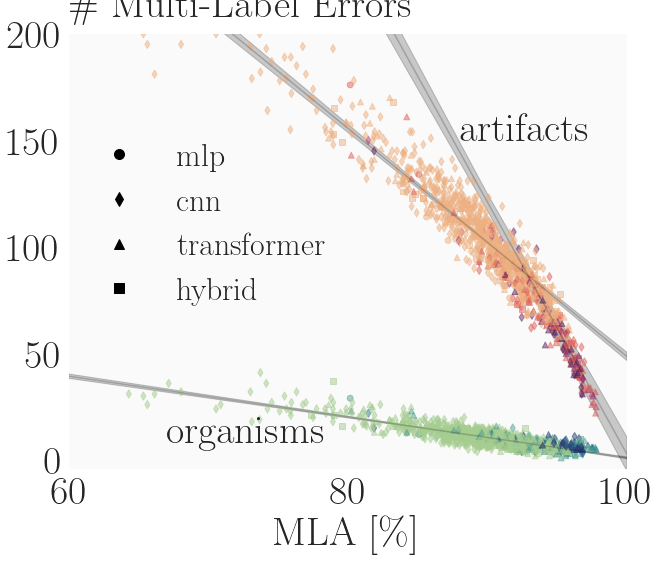

Max ys: [4.37, 15.1, 20.75]
Min ys: [0.33, 4.45, 2.56]
Plot linear fit for group: organism
slope: 0.0203, intercept: 1.9254, rvalue: 0.1954, r^2: 0.0382, a_conf: [0.0149 , 0.0257], std_b: [1.8990 , 1.9517]
Plot linear fit for group: artifact
slope: 0.1791, intercept: 8.2268, rvalue: 0.7783, r^2: 0.6058, a_conf: [0.1678 , 0.1904], std_b: [8.1629 , 8.2907]
slope: 0.5251, intercept: 7.8814, rvalue: 0.5529, r^2: 0.3057, a_conf: [0.5063 , 0.5440], std_b: [7.7011 , 8.0617]
Plot linear fit for group: other
slope: 0.2225, intercept: 12.6694, rvalue: 0.4161, r^2: 0.1731, a_conf: [0.1967 , 0.2483], std_b: [12.5437 , 12.7951]
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_common_co_occ_relative_to_group_mle_marker=arch_family_color=training_data_size_groups=organism_artifact_other


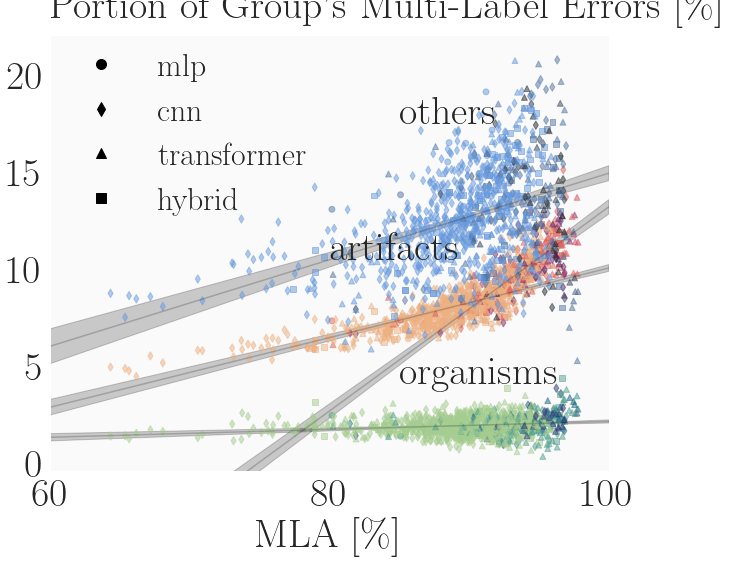

Max ys: [41, 210, 50]
Min ys: [1, 22, 1]
Plot linear fit for group: organism
slope: -0.9577, intercept: 10.6902, rvalue: -0.8628, r^2: 0.7444, a_conf: [-0.9875 , -0.9279], std_b: [10.5452 , 10.8352]
Plot linear fit for group: artifact
slope: -5.3494, intercept: 102.5913, rvalue: -0.9319, r^2: 0.8685, a_conf: [-5.4741 , -5.2246], std_b: [101.8851 , 103.2975]
slope: -11.8189, intercept: 122.0431, rvalue: -0.9114, r^2: 0.8306, a_conf: [-12.2265 , -11.4113], std_b: [118.1506 , 125.9355]
Plot linear fit for group: other
slope: -1.3199, intercept: 20.0208, rvalue: -0.8413, r^2: 0.7078, a_conf: [-1.3650 , -1.2749], std_b: [19.8016 , 20.2400]
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_common_co_occ_abs_marker=arch_family_color=training_data_size_groups=organism_artifact_other


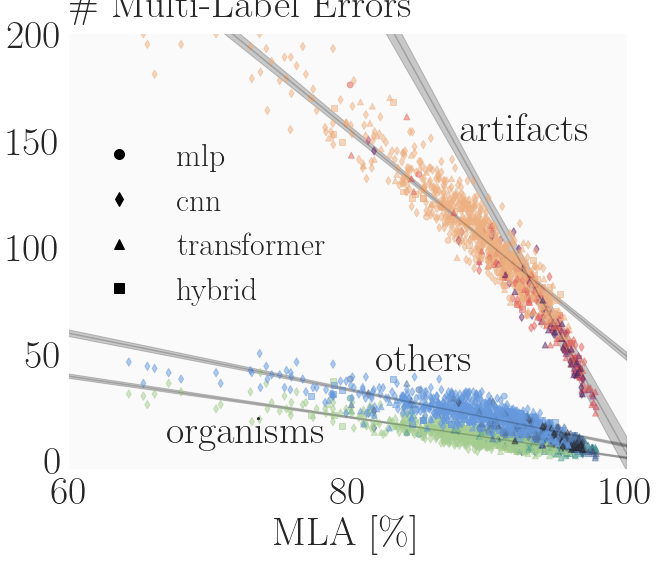

=== ALL ===
Max ys: [10.05]
Min ys: [3.65]
Plot linear fit for group: all
slope: 0.1733, intercept: 6.6713, rvalue: 0.8197, r^2: 0.6719, a_conf: [0.1668 , 0.1797], std_b: [6.6400 , 6.7026]
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_common_co_occ_relative_to_group_mle_marker=arch_family_color=training_data_size_groups=all


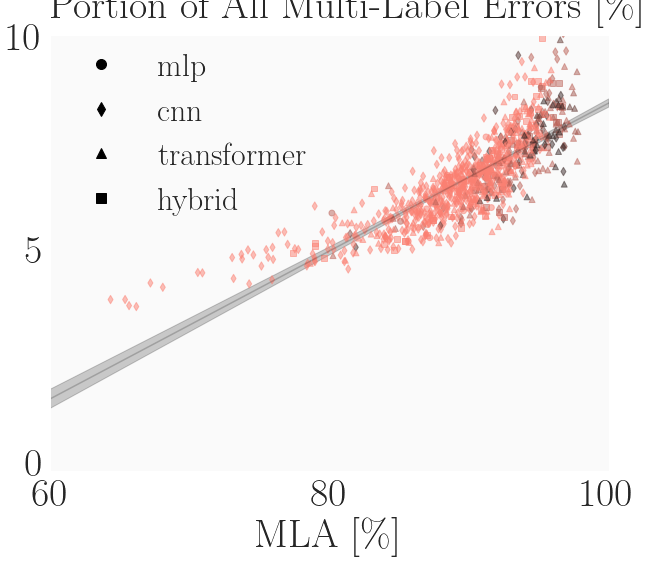

Max ys: [255]
Min ys: [29]
Plot linear fit for group: all
slope: -7.5357, intercept: 116.5291, rvalue: -0.9561, r^2: 0.9142, a_conf: [-7.6583 , -7.4131], std_b: [115.9324 , 117.1259]
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_common_co_occ_abs_marker=arch_family_color=training_data_size_groups=all


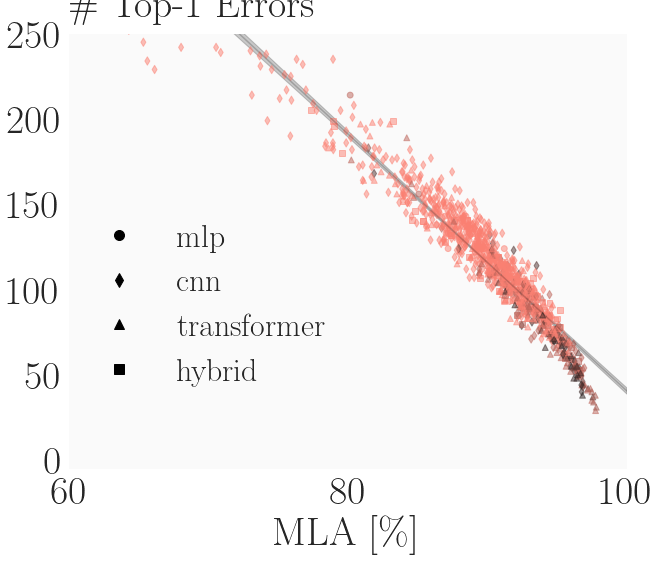

In [364]:
# utils_plot.plot_common_co_occ(results_dfs)
utils_plot.plot_common_co_occ(results_dfs, linear_fit=True,linear_fit_inflection_points={"artifact":93})

# ===============

# Model Failures (Major Errors)

=== PER GROUP ===
Max ys: [42.15, 59.41]
Min ys: [4.02, 20.35]
Plot linear fit for group: organism
Plot linear fit for column value: small (< 5M)
slope: -1.8749, intercept: 24.0087, rvalue: -0.9486, r^2: 0.8998, a_conf: [-1.9102 , -1.8395], std_b: [23.8726 , 24.1448]
Plot linear fit for column value: medium (< 50M)
slope: -2.1870, intercept: 22.5288, rvalue: -0.9596, r^2: 0.9208, a_conf: [-2.2250 , -2.1491], std_b: [22.1903 , 22.8674]
Plot linear fit for column value: large (< 500M)
slope: -2.2963, intercept: 22.6211, rvalue: -0.9665, r^2: 0.9342, a_conf: [-2.3363 , -2.2563], std_b: [21.8803 , 23.3619]
Plot linear fit for column value: xlarge (> 500M)
slope: -2.4234, intercept: 25.2370, rvalue: -0.9345, r^2: 0.8734, a_conf: [-2.4723 , -2.3745], std_b: [24.4718 , 26.0023]
Plot linear fit for group: artifact
Plot linear fit for column value: small (< 5M)
slope: -1.6797, intercept: 45.8697, rvalue: -0.9561, r^2: 0.9142, a_conf: [-1.7337 , -1.6256], std_b: [45.6618 , 46.0775]
Plot linear f

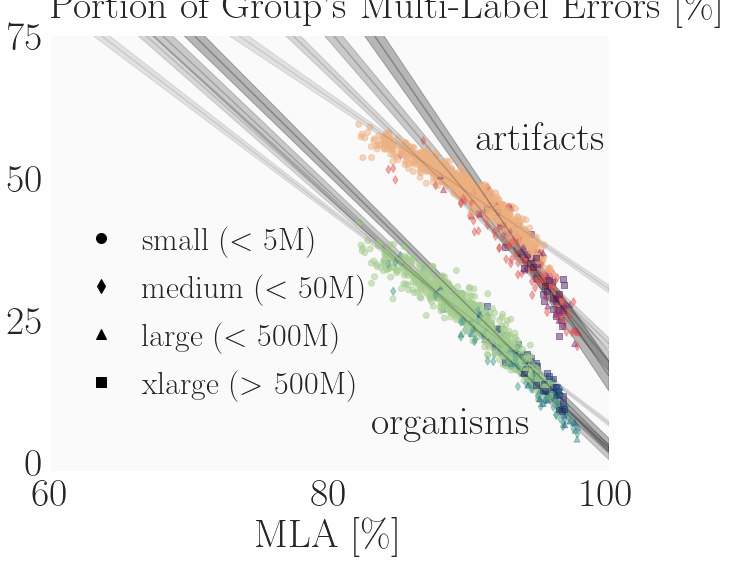

Max ys: [440, 1288]
Min ys: [7, 46]
Plot linear fit for group: organism
Plot linear fit for column value: small (< 5M)
slope: -25.7797, intercept: 127.7842, rvalue: -0.9824, r^2: 0.9652, a_conf: [-26.0964 , -25.4629], std_b: [126.5658 , 129.0026]
Plot linear fit for column value: medium (< 50M)
slope: -22.0188, intercept: 137.5626, rvalue: -0.9693, r^2: 0.9395, a_conf: [-22.3265 , -21.7111], std_b: [134.8153 , 140.3099]
Plot linear fit for column value: large (< 500M)
slope: -17.1588, intercept: 120.0406, rvalue: -0.9761, r^2: 0.9527, a_conf: [-17.6763 , -16.6413], std_b: [110.4590 , 129.6223]
Plot linear fit for column value: xlarge (> 500M)
slope: -16.9824, intercept: 124.8765, rvalue: -0.9469, r^2: 0.8967, a_conf: [-17.4743 , -16.4906], std_b: [117.1802 , 132.5728]
Plot linear fit for group: artifact
Plot linear fit for column value: small (< 5M)
slope: -79.9936, intercept: 543.9885, rvalue: -0.9960, r^2: 0.9920, a_conf: [-80.4591 , -79.5281], std_b: [542.1978 , 545.7793]
Plot linea

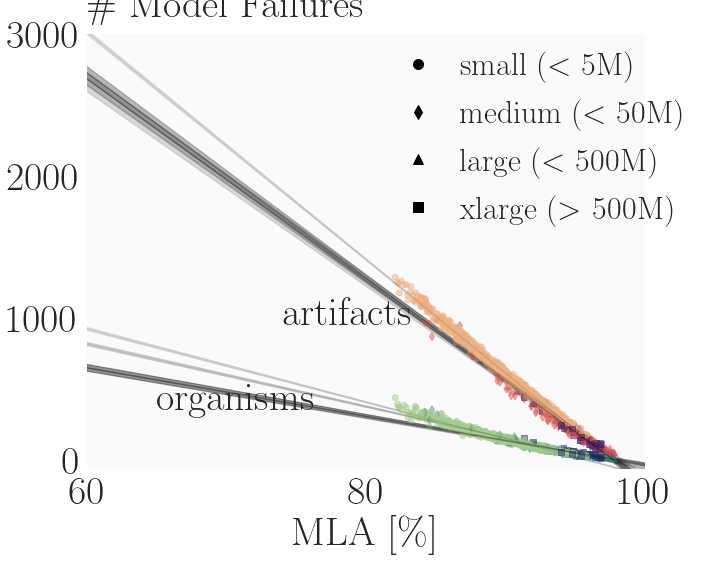

Max ys: [42.15, 59.41, 47.71]
Min ys: [4.02, 20.35, 12.0]
Plot linear fit for group: organism
Plot linear fit for column value: small (< 5M)
slope: -1.8749, intercept: 24.0087, rvalue: -0.9486, r^2: 0.8998, a_conf: [-1.9102 , -1.8395], std_b: [23.8726 , 24.1448]
Plot linear fit for column value: medium (< 50M)
slope: -2.1870, intercept: 22.5288, rvalue: -0.9596, r^2: 0.9208, a_conf: [-2.2250 , -2.1491], std_b: [22.1903 , 22.8674]
Plot linear fit for column value: large (< 500M)
slope: -2.2963, intercept: 22.6211, rvalue: -0.9665, r^2: 0.9342, a_conf: [-2.3363 , -2.2563], std_b: [21.8803 , 23.3619]
Plot linear fit for column value: xlarge (> 500M)
slope: -2.4234, intercept: 25.2370, rvalue: -0.9345, r^2: 0.8734, a_conf: [-2.4723 , -2.3745], std_b: [24.4718 , 26.0023]
Plot linear fit for group: artifact
Plot linear fit for column value: small (< 5M)
slope: -1.6797, intercept: 45.8697, rvalue: -0.9561, r^2: 0.9142, a_conf: [-1.7337 , -1.6256], std_b: [45.6618 , 46.0775]
Plot linear fit fo

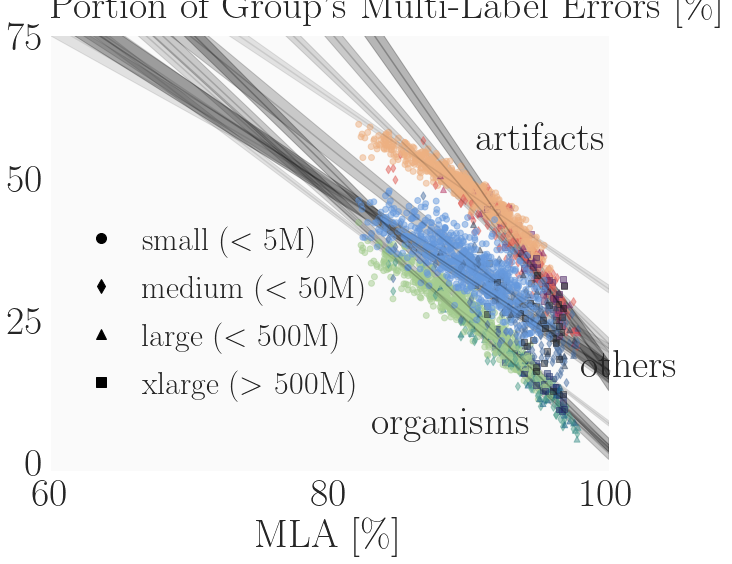

Max ys: [440, 1288, 137]
Min ys: [7, 46, 6]
Plot linear fit for group: organism
Plot linear fit for column value: small (< 5M)
slope: -25.7797, intercept: 127.7842, rvalue: -0.9824, r^2: 0.9652, a_conf: [-26.0964 , -25.4629], std_b: [126.5658 , 129.0026]
Plot linear fit for column value: medium (< 50M)
slope: -22.0188, intercept: 137.5626, rvalue: -0.9693, r^2: 0.9395, a_conf: [-22.3265 , -21.7111], std_b: [134.8153 , 140.3099]
Plot linear fit for column value: large (< 500M)
slope: -17.1588, intercept: 120.0406, rvalue: -0.9761, r^2: 0.9527, a_conf: [-17.6763 , -16.6413], std_b: [110.4590 , 129.6223]
Plot linear fit for column value: xlarge (> 500M)
slope: -16.9824, intercept: 124.8765, rvalue: -0.9469, r^2: 0.8967, a_conf: [-17.4743 , -16.4906], std_b: [117.1802 , 132.5728]
Plot linear fit for group: artifact
Plot linear fit for column value: small (< 5M)
slope: -79.9936, intercept: 543.9885, rvalue: -0.9960, r^2: 0.9920, a_conf: [-80.4591 , -79.5281], std_b: [542.1978 , 545.7793]
Pl

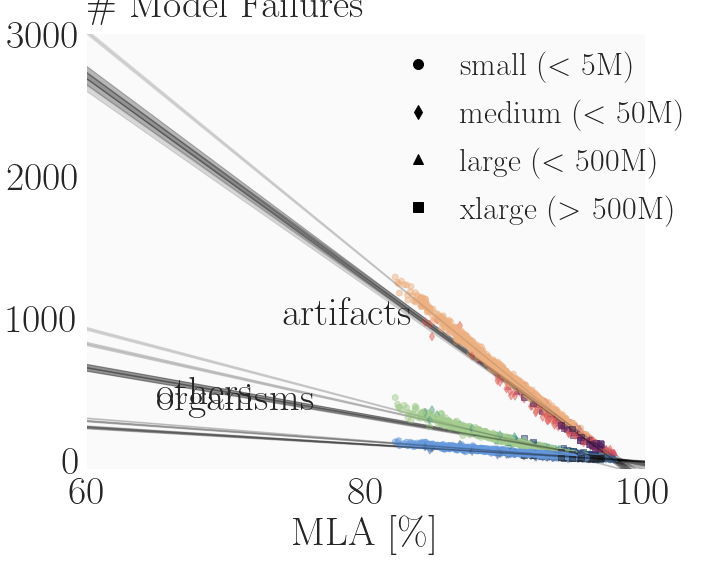

=== ALL ===
Max ys: [53.61]
Min ys: [14.6]
Plot linear fit for group: all
Plot linear fit for column value: small (< 5M)
slope: -1.6724, intercept: 39.3554, rvalue: -0.9619, r^2: 0.9252, a_conf: [-1.7255 , -1.6192], std_b: [39.1509 , 39.5600]
Plot linear fit for column value: medium (< 50M)
slope: -2.3856, intercept: 35.9951, rvalue: -0.9407, r^2: 0.8849, a_conf: [-2.4429 , -2.3283], std_b: [35.4837 , 36.5064]
Plot linear fit for column value: large (< 500M)
slope: -2.8631, intercept: 37.8855, rvalue: -0.9693, r^2: 0.9396, a_conf: [-2.9241 , -2.8022], std_b: [36.7575 , 39.0136]
Plot linear fit for column value: xlarge (> 500M)
slope: -3.4609, intercept: 40.9124, rvalue: -0.9424, r^2: 0.8882, a_conf: [-3.5591 , -3.3627], std_b: [39.3753 , 42.4494]
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_not_classified_relative_to_group_mle_marker=training_data_group_color=training_data_size_groups=all


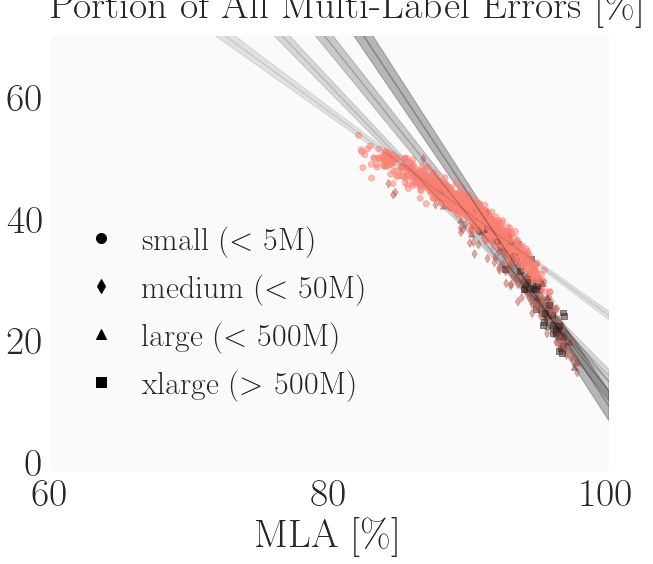

Max ys: [1766]
Min ys: [60]
Plot linear fit for group: all
Plot linear fit for column value: small (< 5M)
slope: -107.7906, intercept: 689.4137, rvalue: -0.9959, r^2: 0.9919, a_conf: [-108.3874 , -107.1938], std_b: [687.1178 , 691.7095]
Plot linear fit for column value: medium (< 50M)
slope: -92.9531, intercept: 638.0613, rvalue: -0.9881, r^2: 0.9764, a_conf: [-94.1963 , -91.7099], std_b: [626.9608 , 649.1617]
Plot linear fit for column value: large (< 500M)
slope: -90.2225, intercept: 653.5502, rvalue: -0.9941, r^2: 0.9881, a_conf: [-91.4452 , -88.9998], std_b: [630.9119 , 676.1884]
Plot linear fit for column value: xlarge (> 500M)
slope: -91.4347, intercept: 639.2545, rvalue: -0.9899, r^2: 0.9799, a_conf: [-92.7353 , -90.1341], std_b: [618.9019 , 659.6071]
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_not_classified_abs_marker=training_data_group_color=training_data_size_groups=all


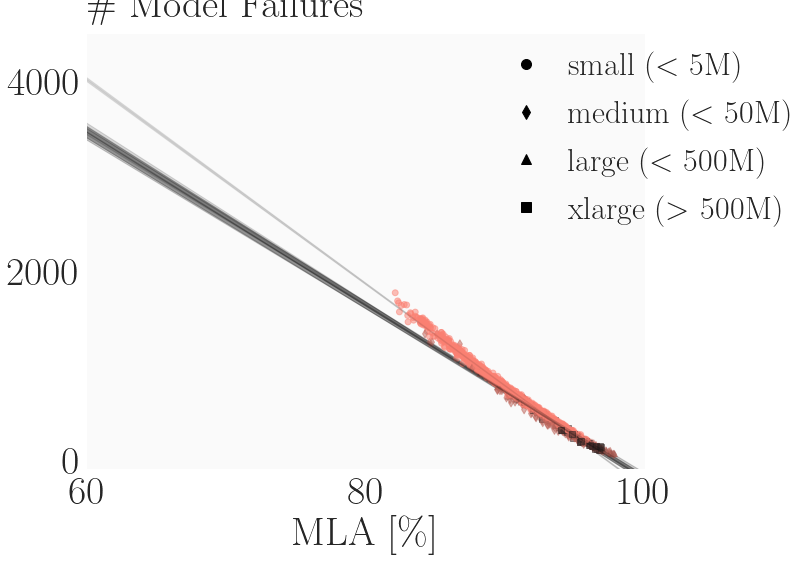

In [440]:
utils_plot.plot_model_failures(results_dfs,
                               marker_column="training_data_group",
                               filter={
                                       "imagenet_mla_val_acc": (">", 82),
                               },
                               linear_fit = True, linear_fit_by_column="training_data_group",
                               # linear_fit_inflection_points={"artifact":95}
                               )

=== PER GROUP ===
Max ys: [27.51, 44.56]
Min ys: [4.02, 20.35]
Plot linear fit for group: organism
Plot linear fit for column value: cnn
slope: -2.0695, intercept: 14.3990, rvalue: -0.9091, r^2: 0.8264, a_conf: [-2.2386 , -1.9004], std_b: [13.7754 , 15.0226], n: 28
Plot linear fit for column value: transformer
slope: -2.5272, intercept: 14.1353, rvalue: -0.9387, r^2: 0.8811, a_conf: [-2.6809 , -2.3735], std_b: [13.7978 , 14.4727], n: 79
Plot linear fit for group: artifact
Plot linear fit for column value: cnn
slope: -3.0793, intercept: 32.5620, rvalue: -0.9184, r^2: 0.8434, a_conf: [-3.2918 , -2.8669], std_b: [31.7785 , 33.3455], n: 28
Plot linear fit for column value: transformer
slope: -2.8039, intercept: 32.1297, rvalue: -0.9156, r^2: 0.8384, a_conf: [-3.0063 , -2.6014], std_b: [31.6852 , 32.5742], n: 79
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_not_classified_relative_to_group_mle_marker=arch_group_color=num_params_groups=organism_artifact


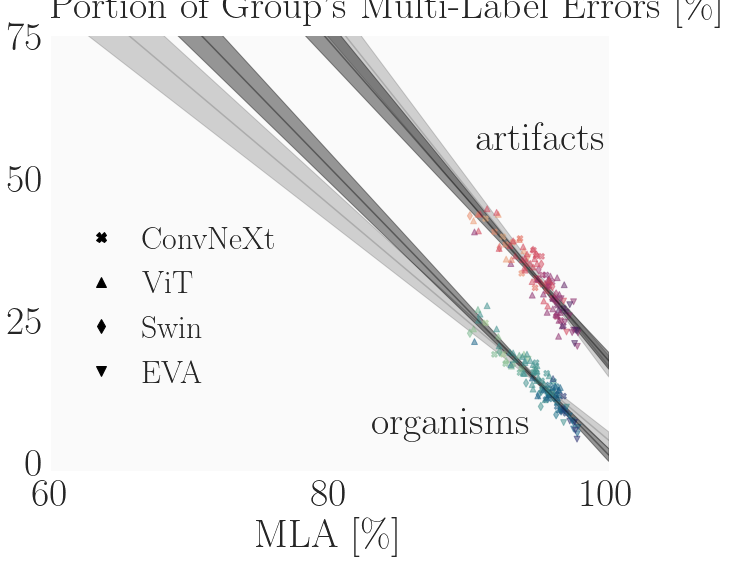

Max ys: [163, 502]
Min ys: [7, 46]
Plot linear fit for group: organism
Plot linear fit for column value: cnn
slope: -16.0980, intercept: 52.8657, rvalue: -0.9639, r^2: 0.9290, a_conf: [-16.9833 , -15.2126], std_b: [49.6008 , 56.1307], n: 28
Plot linear fit for column value: transformer
slope: -18.6552, intercept: 54.5015, rvalue: -0.9678, r^2: 0.9367, a_conf: [-19.4459 , -17.8646], std_b: [52.7656 , 56.2374], n: 79
Plot linear fit for group: artifact
Plot linear fit for column value: cnn
slope: -62.3149, intercept: 196.5482, rvalue: -0.9877, r^2: 0.9756, a_conf: [-63.9613 , -60.6685], std_b: [190.4767 , 202.6197], n: 28
Plot linear fit for column value: transformer
slope: -59.4783, intercept: 198.4769, rvalue: -0.9873, r^2: 0.9748, a_conf: [-61.0405 , -57.9160], std_b: [195.0471 , 201.9068], n: 79
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_not_classified_abs_marker=arch_group_color=num_params_groups=organism_artifact


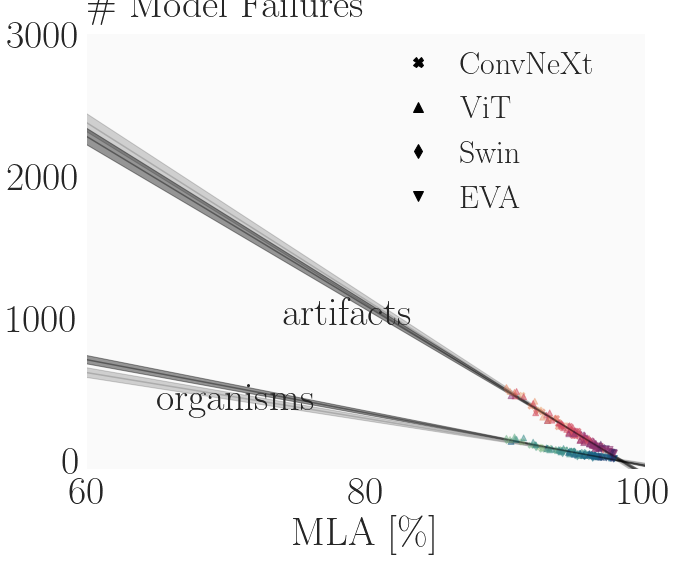

Max ys: [27.51, 44.56, 37.96]
Min ys: [4.02, 20.35, 12.0]
Plot linear fit for group: organism
Plot linear fit for column value: cnn
slope: -2.0695, intercept: 14.3990, rvalue: -0.9091, r^2: 0.8264, a_conf: [-2.2386 , -1.9004], std_b: [13.7754 , 15.0226], n: 28
Plot linear fit for column value: transformer
slope: -2.5272, intercept: 14.1353, rvalue: -0.9387, r^2: 0.8811, a_conf: [-2.6809 , -2.3735], std_b: [13.7978 , 14.4727], n: 79
Plot linear fit for group: artifact
Plot linear fit for column value: cnn
slope: -3.0793, intercept: 32.5620, rvalue: -0.9184, r^2: 0.8434, a_conf: [-3.2918 , -2.8669], std_b: [31.7785 , 33.3455], n: 28
Plot linear fit for column value: transformer
slope: -2.8039, intercept: 32.1297, rvalue: -0.9156, r^2: 0.8384, a_conf: [-3.0063 , -2.6014], std_b: [31.6852 , 32.5742], n: 79
Plot linear fit for group: other
Plot linear fit for column value: cnn
slope: -1.9634, intercept: 23.2718, rvalue: -0.6404, r^2: 0.4102, a_conf: [-2.3521 , -1.5747], std_b: [21.8384 , 24

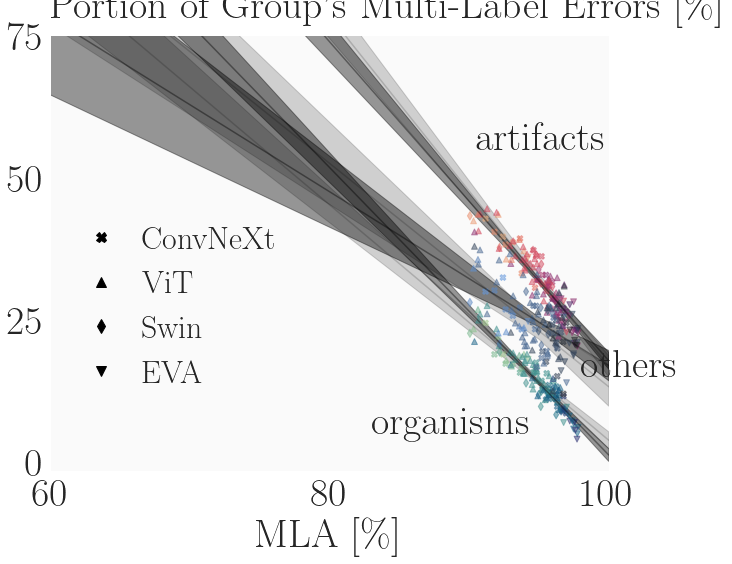

Max ys: [163, 502, 53]
Min ys: [7, 46, 6]
Plot linear fit for group: organism
Plot linear fit for column value: cnn
slope: -16.0980, intercept: 52.8657, rvalue: -0.9639, r^2: 0.9290, a_conf: [-16.9833 , -15.2126], std_b: [49.6008 , 56.1307], n: 28
Plot linear fit for column value: transformer
slope: -18.6552, intercept: 54.5015, rvalue: -0.9678, r^2: 0.9367, a_conf: [-19.4459 , -17.8646], std_b: [52.7656 , 56.2374], n: 79
Plot linear fit for group: artifact
Plot linear fit for column value: cnn
slope: -62.3149, intercept: 196.5482, rvalue: -0.9877, r^2: 0.9756, a_conf: [-63.9613 , -60.6685], std_b: [190.4767 , 202.6197], n: 28
Plot linear fit for column value: transformer
slope: -59.4783, intercept: 198.4769, rvalue: -0.9873, r^2: 0.9748, a_conf: [-61.0405 , -57.9160], std_b: [195.0471 , 201.9068], n: 79
Plot linear fit for group: other
Plot linear fit for column value: cnn
slope: -4.8083, intercept: 18.7609, rvalue: -0.9251, r^2: 0.8558, a_conf: [-5.1864 , -4.4303], std_b: [17.3666 , 

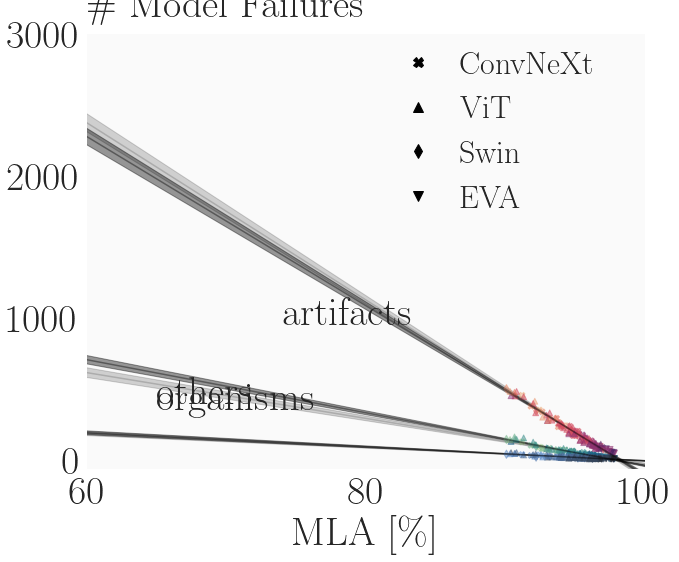

=== ALL ===
Max ys: [38.22]
Min ys: [14.6]
Plot linear fit for group: all
Plot linear fit for column value: cnn
slope: -2.8550, intercept: 25.7831, rvalue: -0.9424, r^2: 0.8880, a_conf: [-3.0166 , -2.6935], std_b: [25.1873 , 26.3789], n: 28
Plot linear fit for column value: transformer
slope: -2.8366, intercept: 25.6756, rvalue: -0.9461, r^2: 0.8950, a_conf: [-2.9942 , -2.6790], std_b: [25.3297 , 26.0215], n: 79
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_not_classified_relative_to_group_mle_marker=arch_group_color=num_params_groups=all


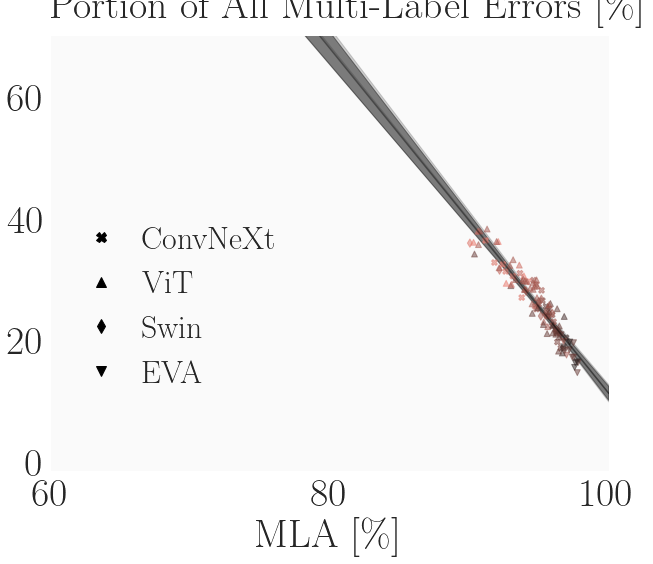

Max ys: [657]
Min ys: [60]
Plot linear fit for group: all
Plot linear fit for column value: cnn
slope: -79.0098, intercept: 254.1604, rvalue: -0.9925, r^2: 0.9851, a_conf: [-80.9364 , -77.0831], std_b: [247.0553 , 261.2655], n: 28
Plot linear fit for column value: transformer
slope: -79.3398, intercept: 260.3476, rvalue: -0.9894, r^2: 0.9788, a_conf: [-81.1838 , -77.4957], std_b: [256.2990 , 264.3961], n: 79
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_not_classified_abs_marker=arch_group_color=num_params_groups=all


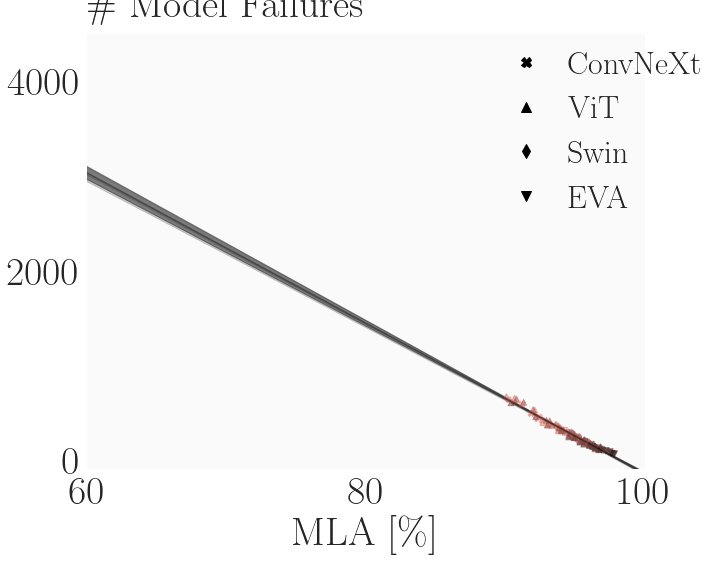

In [460]:
utils_plot.plot_model_failures(results_dfs,
                               marker_column="arch_group",
                               filter={"arch_family": ("in", ["cnn","transformer"]),
                                       "arch_group": ("in", ["ViT","XCiT","MaxViT","Swin","EVA","ConvNeXt"]),
                                      # "arch_group": ("in", ["ViT","XCiT","MaxViT","Swin","ConvNeXt"]),
                                      #  "arch_group": ("in", ["ViT","ConvNeXt"]),
                                       "training_data_size": (">", 5000000),
                                       "imagenet_mla_val_acc": (">", 90)},
                               linear_fit = True, linear_fit_by_column="arch_family",
                               color_column="num_params"
                               )#linear_fit_inflection_points={"artifact":93,"organism":92,})

=== PER GROUP ===
Max ys: [55.94, 71.9]
Min ys: [4.02, 20.35]
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_not_classified_relative_to_group_mle_marker=arch_family_color=training_data_size_groups=organism_artifact


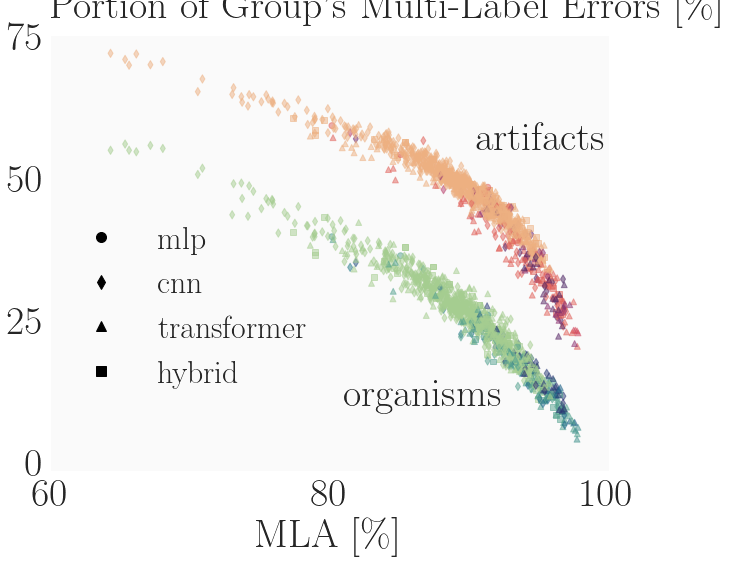

Max ys: [1233, 3002]
Min ys: [7, 46]
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_not_classified_abs_marker=arch_family_color=training_data_size_groups=organism_artifact


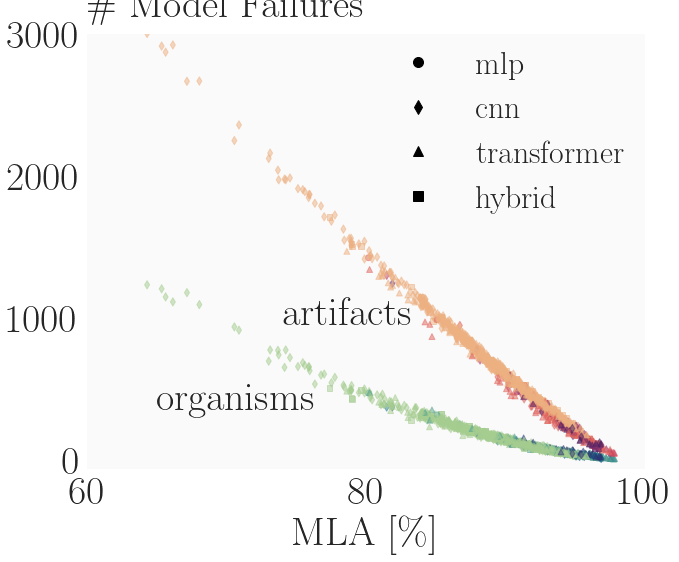

Max ys: [55.94, 71.9, 62.43]
Min ys: [4.02, 20.35, 12.0]
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_not_classified_relative_to_group_mle_marker=arch_family_color=training_data_size_groups=organism_artifact_other


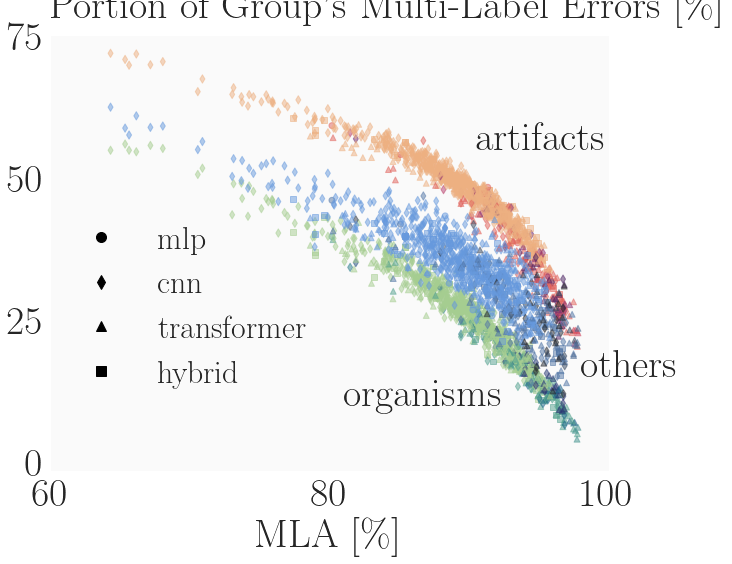

Max ys: [1233, 3002, 329]
Min ys: [7, 46, 6]
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_not_classified_abs_marker=arch_family_color=training_data_size_groups=organism_artifact_other


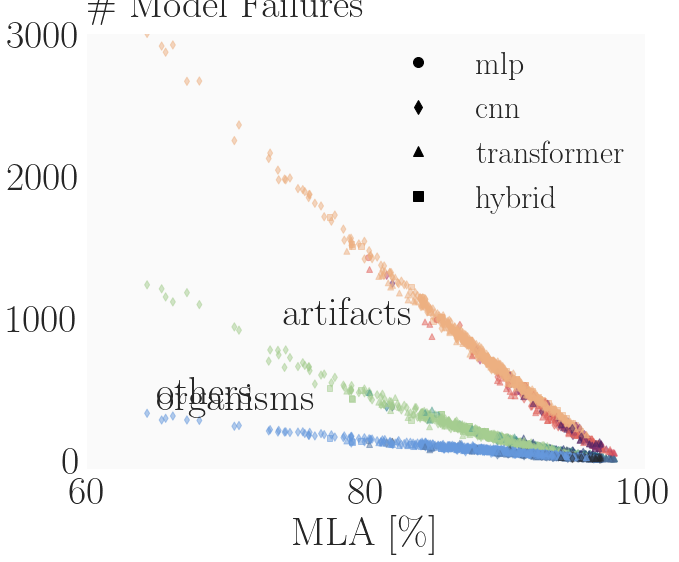

=== ALL ===
Max ys: [65.88]
Min ys: [14.6]
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_not_classified_relative_to_group_mle_marker=arch_family_color=training_data_size_groups=all


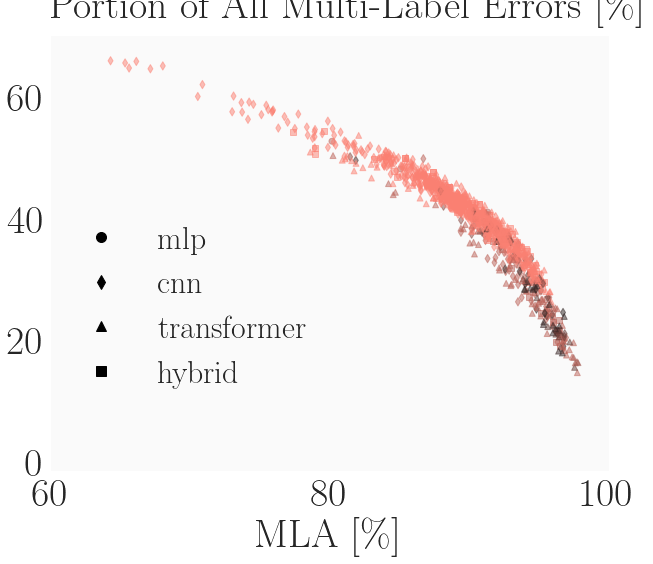

Max ys: [4356]
Min ys: [60]
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_not_classified_abs_marker=arch_family_color=training_data_size_groups=all


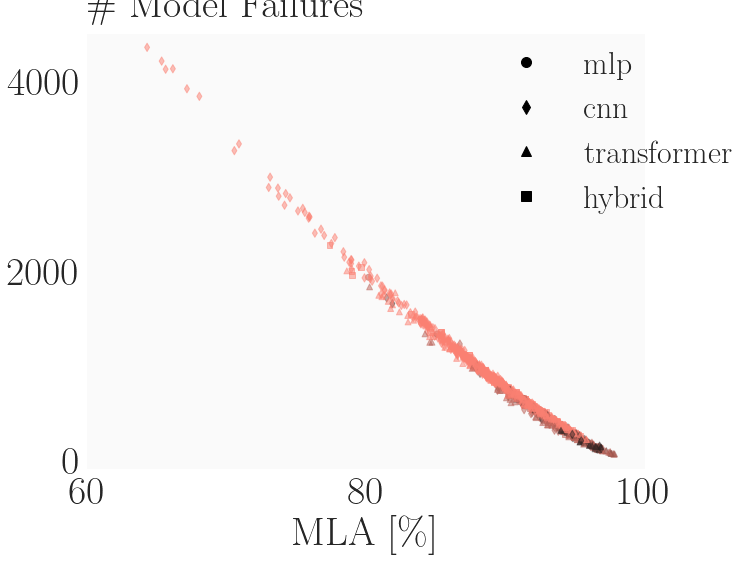

In [345]:
utils_plot.plot_model_failures(results_dfs)
# utils_plot.plot_model_failures(results_dfs, linear_fit=True,linear_fit_inflection_points={"artifact":93,"organism":93})

# ===============

# Multi-Label Model Failures (MLF) / Multi-Label Errors (MLE) (per group and all)

=== PER GROUP ===
Max ys: [55.94, 71.9]
Min ys: [4.02, 20.35]
Plot linear fit for group: organism
slope: -1.4270, intercept: 25.9593, rvalue: -0.9475, r^2: 0.8979, a_conf: [-1.4610 , -1.3931], std_b: [25.7672 , 26.1515]
slope: -2.7509, intercept: 28.1365, rvalue: -0.8978, r^2: 0.8061, a_conf: [-2.8241 , -2.6777], std_b: [27.4372 , 28.8357]
Plot linear fit for group: artifact
slope: -1.1950, intercept: 47.6166, rvalue: -0.9383, r^2: 0.8803, a_conf: [-1.2433 , -1.1467], std_b: [47.3431 , 47.8900]
slope: -4.0490, intercept: 54.8200, rvalue: -0.8996, r^2: 0.8093, a_conf: [-4.2163 , -3.8817], std_b: [53.2227 , 56.4174]
Figure file name: ../figures/imagenet/x_axis=mla_all_y_axis=num_not_classified_relative_to_group_mle_marker=arch_family_color=training_data_size_groups=organism_artifact


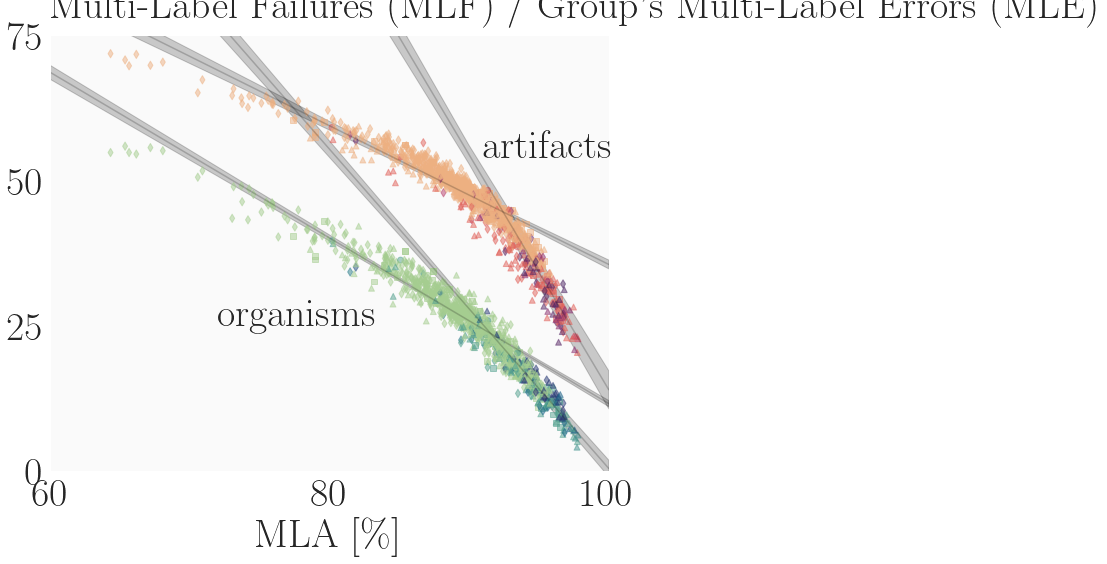

TypeError: plot_graphs() got multiple values for keyword argument 'linear_fit_inflection_points'

In [378]:
# utils_plot.plot_model_failures_to_mle(results_dfs)
utils_plot.plot_model_failures_to_mle(results_dfs,
                                      linear_fit=True,
                                      linear_fit_inflection_points={"artifact":93, "organism":93})

# ===============

# Multi-Label Model Failures (MLF) / Top-1 Errors (per group and all)

=== PER GROUP ===
Max ys: [51.0, 61.62]
Min ys: [1.86, 5.04]
Plot linear fit for group: organism
slope: -1.4382, intercept: 18.7525, rvalue: -0.9633, r^2: 0.9279, a_conf: [-1.4636 , -1.4128], std_b: [18.5445 , 18.9605]
slope: -1.8018, intercept: 17.6512, rvalue: -0.9583, r^2: 0.9183, a_conf: [-1.8210 , -1.7826], std_b: [17.5364 , 17.7660]
Plot linear fit for group: artifact
slope: -1.4385, intercept: 30.0830, rvalue: -0.9787, r^2: 0.9579, a_conf: [-1.4863 , -1.3906], std_b: [29.6915 , 30.4745]
slope: -2.6335, intercept: 29.0068, rvalue: -0.9765, r^2: 0.9535, a_conf: [-2.6817 , -2.5854], std_b: [28.7191 , 29.2944]
Figure file name: ../figures/imagenet/x_axis=top1_val_acc_y_axis=num_not_classified_relative_to_group_top1_err_marker=arch_family_color=training_data_size_groups=organism_artifact


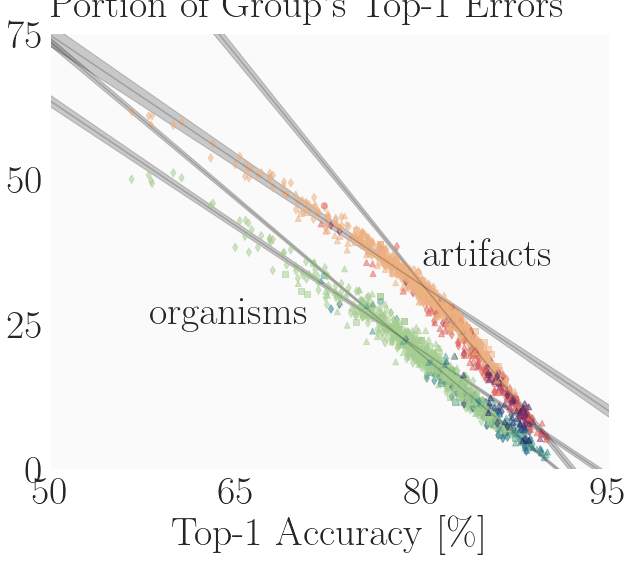

TypeError: plot_graphs() got multiple values for keyword argument 'linear_fit_inflection_points'

In [387]:
utils_plot.plot_model_failures_to_top1_err(results_dfs,
                                           linear_fit=True,linear_fit_inflection_points={"artifact":80,"organism":80})

# ===============